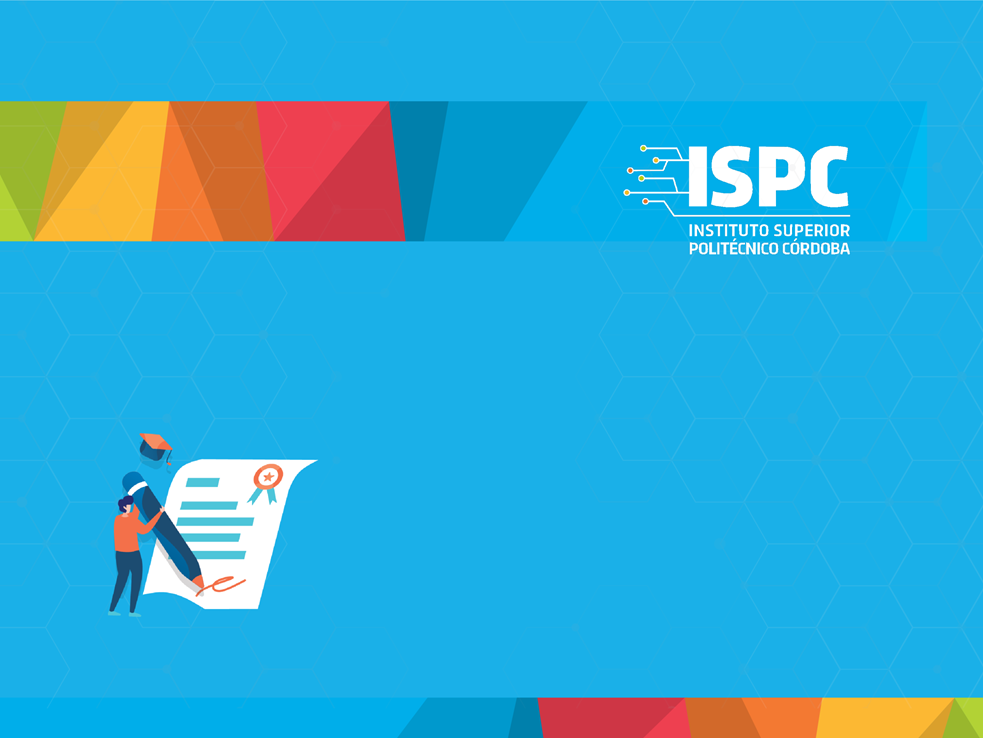

# 8ta Semana 04/08/2021- Algebra, aplicación en ML

https://www.datasource.ai/es/data-science-articles/una-guia-para-principiantes-sobre-la-regresion-lineal-en-python-con-scikit-learn

https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/

## Redes Neuronales – Teoría

La programación clásica y las redes neuronales son aproximaciones distintas para resolver problemas. 

En la programación clásica, escribimos código fuente indicando al ordenador qué decisiones han de tomarse de forma absolutamente determinista para resolver un problema, una descripción detallada de todo lo que hay que hacer, similar a una receta. Por ejemplo, si lo que queremos es sumar dos números, tiene sentido programar en nuestro lenguaje favorito el algoritmo de la suma. 

Sin embargo, supongamos que nuestro problema es distinguir si una fotografía es un coche o no. En principio, no parece complicado cómo estructurar un algoritmo, un coche siempre tiene cuatro ruedas, ventanas, parabrisas, faros.



## Comparación de neurona humana y neurona artificial

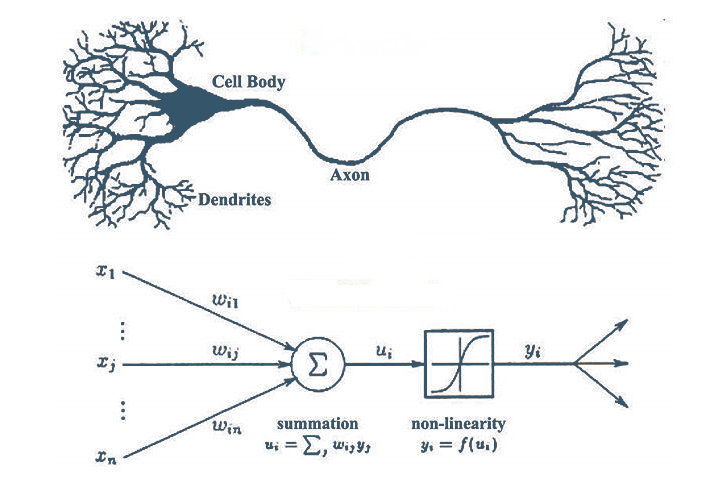

## ¿Que es una red neuronal?
Las redes neuronales artificiales (también conocidas como sistemas conexionistas) son un modelo matemático-computacional el que fue evolucionando a partir de diversas aportaciones científicas que están registradas en la historia. 

Consiste en un conjunto de unidades, llamadas neuronas artificiales, conectadas entre sí para transmitirse señales. La información de entrada atraviesa la red neuronal (donde se somete a diversas operaciones) produciendo unos valores de salida.

<b>Cada neurona está conectada con otras a través de unos enlaces. En estos enlaces el valor de salida de la neurona anterior es multiplicado por un valor de peso.</b> 

Estos pesos en los enlaces pueden incrementar o inhibir el estado de activación de las neuronas adyacentes. Del mismo modo, a la salida de la neurona, puede existir una función limitadora o umbral, que modifica el valor resultado o impone un límite que no se debe sobrepasar antes de propagarse a otra neurona. 

<b>Esta función se conoce como función de activación.</b>

Estos sistemas aprenden y se forman a sí mismos, en lugar de ser programados de forma explícita, y sobresalen en áreas donde la detección de soluciones o características es difícil de expresar con la programación convencional. 

<b>Para realizar este aprendizaje automático, normalmente, se intenta minimizar una función de pérdida que evalúa la red en su total.</b> 

<b>Los valores de los pesos de las neuronas se van actualizando buscando reducir el valor de la función de pérdida. Este proceso se realiza mediante la propagación hacia atrás.</b>

https://es.wikipedia.org/wiki/Red_neuronal_artificial#:~:text=Las%20redes%20neuronales%20artificiales%20%28tambi%C3%A9n%20conocidas%20como%20sistemas,en%20el%20comportamiento%20observado%20en%20su%20hom%C3%B3logo%20biol%C3%B3gico.

## Perceptron

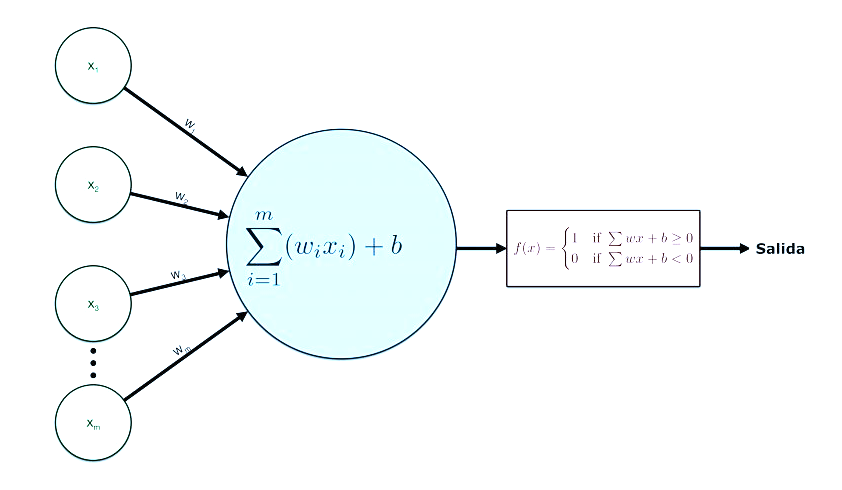

## Analizamos un ejemplo

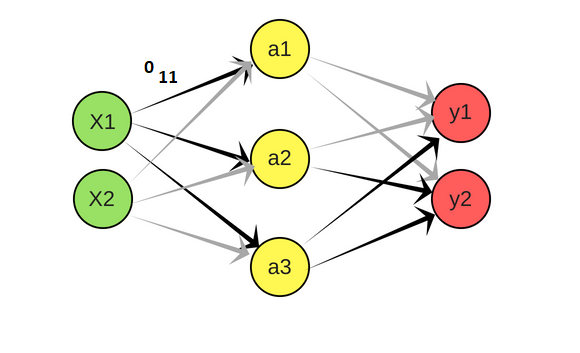

La estructura de una red neuronal es como se observa en la figura


$X(i)$ son las entradas
$a(i)$ activación en la capa 2
$y(i)$ son las salidas

Y quedan implícitos, pero sin representación en la gráfica:

$O(j)$ Los pesos de las conexiones entre neuronas será una matriz que mapea la capa $j$ a la $j+1$

Recordemos que utilizamos 1 neurona extra en la capa 1 y una neurona extra en la capa 2 a modo de Bias -no están en la gráfica- para mejorar la precisión de la red neuronal, dandole mayor “libertad algebraica”.

Los cálculos para obtener los valores de activación serán:

$$a(1) = g(O^T_1X)$$

$$a(2) = g(O^T_2X)$$

$$a(3) = g(O^T_3X)$$

En las ecuaciones, la g es una función Sigmoide que refiere al caso especial de función logística y definida por la fórmula:

$$g(z) = \frac{1}{(1+e^{-z})}$$

## Forward Propagation ó red Feedforward

Con Feedforward nos referimos al recorrido de “izquierda a derecha” que hace el algoritmo de la red, para calcular el valor de activación de las neuronas desde las entradas hasta obtener los valores de salida.

Si usamos notación matricial, las ecuaciones para obtener las salidas de la red serán:

$$ X = [x0, x1, x2] $$

$$ z_{layer_2} = O_1X $$

$$ a_{layer_2} = g(z_{layer_2})$$

$$ z_{layer_3} = O_2a_{layer_2}$$

$$ y = g(z_{layer_3})$$


Resumiendo: tenemos una red; tenemos 2 entradas, éstas se multiplican por los pesos de las conexiones y cada neurona en la capa oculta suma esos productos y les aplica la función de activación para “emitir” un resultado a la siguiente conexión (concepto conocido en biología como sinapsis química).

## Programa de cálculo de función XOR

In [4]:
import numpy as np


def sigmoid(x, deriv=False):
    """
    Sigmod retorna un valor entre 0 y 1, es usado para genera la probabilidad 
    de un numero.
    
    https://es.wikipedia.org/wiki/Funci%C3%B3n_sigmoide
    """
    if deriv:
        return x * (1 - x)

    return 1 / (1 + np.exp(-x))


# input data A, B, X
X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1],
    ])

# output data Q
y = np.array([
    [0],
    [1],
    [1],
    [0],
    ])

# setea el generador de num. aleatorios con una semilla conocida = 1
np.random.seed(1)

# Matriz de Sinapsis, es la conección entre una neurona y una capa y todas las neuronas
# de la capa siguinte. https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg
# Esta red es de 3 layers asi que solo tenemos 2 sinapsis.
#
# capa1 <-- sinapsis0 --> capa2 <-- sinapsis1 --> capa3
n_layers = 3
n_connections = 4
n_outputs = 1

# Matríz de sinapsis 0, conecta el layer 0 con el layer 1
# A [n,n,n,n,] 
# B [n,n,n,n,] 
# X [n,n,n,n,] 
syn0 = 2 * np.random.random((n_layers, n_connections)) - 1
 
# Matríz de sinapsis 1, conecta el layer 1 con el layer 2
#  Q
# [n]
# [n]
# [n]
# [n]
syn1 = 2 * np.random.random((n_connections, n_outputs)) - 1

# Etapa de entrenamiento sobre 60000 iteraciones y cada 10000 mostramos la 
# reducción del error.
n_trainning = 100000
n_error_debug = 10000

def xrange(x):
    return iter(range(x))

for j in xrange(n_trainning):

    layer0 = X
    layer1 = sigmoid(np.dot(layer0, syn0))
    layer2 = sigmoid(np.dot(layer1, syn1))

    layer2_err = y - layer2

    if (j % n_error_debug) == 0:
        print("Error: " + str(np.mean(np.abs(layer2_err))))


    layer2_delta = layer2_err * sigmoid(layer2, deriv=True)
    
    layer1_err = layer2_delta.dot(syn1.T)

    layer1_delta = layer1_err * sigmoid(layer1, deriv=True)

    # actualiza el weight (peso), algoritmo gradient descent
    syn1 += layer1.T.dot(layer2_delta)
    syn0 += layer0.T.dot(layer1_delta)

# Finalmente mostramos el resultado
print("Output pos entrenamiento")
print (layer2)

Error: 0.49641003190272537
Error: 0.008584525653247159
Error: 0.0057894598625078085
Error: 0.004629176776769985
Error: 0.003958765280273649
Error: 0.0035101225678616766
Error: 0.003183502385874825
Error: 0.0029323063422830717
Error: 0.0027315064182105086
Error: 0.0025663172400400263
Output pos entrenamiento
[[0.00199094]
 [0.99751458]
 [0.99771098]
 [0.00294418]]
